In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..//")
import farField.farField as ff

In [2]:
data0 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Cuppoletti Lab" \
            "\\NearFieldAcousticDuctedRotor\\slade mic data\\20220725\\ducted\\tm0.50" \
            "\\mic6inplane\\"

troydata2 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\02Inch\\70_Percent.tdms"
troydata4 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\04Inch\\70_Percent.tdms"
troydata6 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\06Inch\\70_Percent.tdms"
troydata8 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\08Inch\\70_Percent.tdms"
troydata10 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\10Inch\\70_Percent.tdms"
troydata12 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\12Inch\\70_Percent.tdms"
troydata24 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\24Inch\\70_Percent.tdms"
troydata36 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor1\\36Inch\\70_Percent.tdms"
troydata48 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor1\\48Inch\\70_Percent.tdms"
troydata60 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor - Riley, Troy (riley2tm)'s files\\60Inch\\70_Percent.tdms"
troydata96 = "C:\\Users\\spbro\\OneDrive - University of Cincinnati\\Troy Data\\OpenRotor\\96Inch\\70_Percent.tdms"

mymicData = ff.micData(data0, 204800, 5)
troy2 = ff.micData(troydata2, 204800, 15, True)
troy4 = ff.micData(troydata4, 204800, 15, True)
troy6 = ff.micData(troydata6, 204800, 15, True)
troy8 = ff.micData(troydata8, 204800, 15, True)
troy10 = ff.micData(troydata10, 204800, 15, True)
troy12 = ff.micData(troydata12, 204800, 15, True)
troy24 = ff.micData(troydata24, 204800, 15, True)
troy36 = ff.micData(troydata36, 204800, 15, True)
troy48 = ff.micData(troydata48, 204800, 15, True)
troy60 = ff.micData(troydata60, 204800, 15, True)
troy96 = ff.micData(troydata96, 204800, 15, True)

In [3]:
corfac = np.array([1., 1., 1., 1., 1., 1., 1., 1.])
mymicData.dataProcess(corfac)
troy2.dataProcess(corfac)
troy4.dataProcess(corfac)
troy6.dataProcess(corfac)
troy8.dataProcess(corfac)
troy10.dataProcess(corfac)
troy12.dataProcess(corfac)
troy24.dataProcess(corfac)
troy36.dataProcess(corfac)
troy48.dataProcess(corfac)
troy60.dataProcess(corfac)
troy96.dataProcess(corfac)

In [4]:
spl0, freq0 = mymicData.narrowband(0, 50)
spl1, freq1 = mymicData.narrowband(1, 50)
spl2, freq2 = mymicData.narrowband(2, 50)
spl3, freq3 = mymicData.narrowband(3, 50)
spl4, freq4 = mymicData.narrowband(4, 50)
spl5, freq5 = mymicData.narrowband(5, 50)
spl6, freq6 = mymicData.narrowband(6, 50)
spl7, freq7 = mymicData.narrowband(7, 50)
spl8, freq8 = mymicData.narrowband(8, 50)
spl9, freq9 = mymicData.narrowband(9, 50)
spl10, freq10 = mymicData.narrowband(10, 50)
spl11, freq11 = mymicData.narrowband(11, 50)
spl12, freq12 = mymicData.narrowband(12, 50)
troyspl2, troyfreq2 = troy2.narrowband(0, 50)
troyspl4, troyfreq4 = troy4.narrowband(0, 50)
troyspl6, troyfreq6 = troy6.narrowband(0, 50)
troyspl8, troyfreq8 = troy8.narrowband(0, 50)
troyspl10, troyfreq10 = troy10.narrowband(0, 50)
troyspl12, troyfreq12 = troy12.narrowband(0, 50)
troyspl24, troyfreq24 = troy24.narrowband(0, 50)
troyspl36, troyfreq36 = troy36.narrowband(0, 50)
troyspl48, troyfreq48 = troy48.narrowband(0, 50)
troyspl60, troyfreq60 = troy60.narrowband(0, 50)
troyspl96, troyfreq96 = troy96.narrowband(0, 50)
troyoaspl2 = troy2.oaspl(0)
troyoaspl4 = troy2.oaspl(0)
troyoaspl6 = troy2.oaspl(0)
troyoaspl8 = troy2.oaspl(0)
troyoaspl10 = troy2.oaspl(0)
troyoaspl12 = troy12.oaspl(0)
troyoaspl24 = troy24.oaspl(0)
troyoaspl36 = troy36.oaspl(0)
troyoaspl48 = troy48.oaspl(0)
troyoaspl60 = troy60.oaspl(0)
troyoaspl96 = troy96.oaspl(0)
data0 = mymicData.oaspl(0)
data1 = mymicData.oaspl(1)
data2 = mymicData.oaspl(2)
data3 = mymicData.oaspl(3)
data4 = mymicData.oaspl(4)
data5 = mymicData.oaspl(5)
data6 = mymicData.oaspl(6)
data7 = mymicData.oaspl(7)
data8 = mymicData.oaspl(8)
data9 = mymicData.oaspl(9)
data10 = mymicData.oaspl(10)
data11 = mymicData.oaspl(11)
data12 = mymicData.oaspl(12)

In [5]:
troyspl24100, troyfreq24100 = troy24.narrowband(0, 100)
troyspl48100, troyfreq48100 = troy48.narrowband(0, 100)
troyspl96100, troyfreq96100 = troy96.narrowband(0, 100)

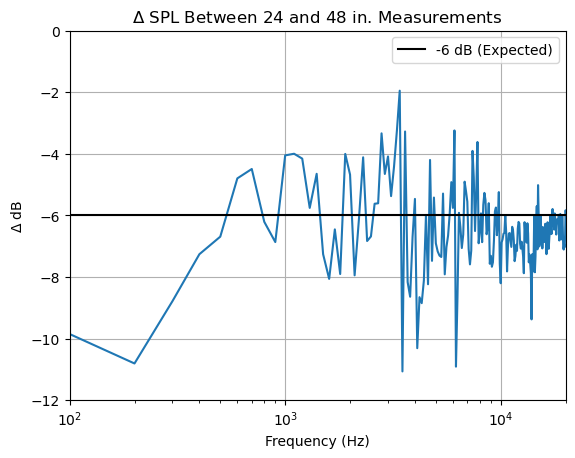

In [6]:
troydata2448 = troyspl48100[6] - troyspl24100[6]
plt.plot(troyfreq24100, troydata2448)
plt.xscale("log")
plt.xlim([100, 20000])
plt.plot([0, 100000], [-6, -6], "k", label="-6 dB (Expected)")
plt.legend()
plt.ylim([-12, 0])
plt.xlabel("Frequency (Hz)")
plt.ylabel("$\Delta$ dB")
plt.title("$\Delta$ SPL Between 24 and 48 in. Measurements")
plt.grid()
plt.show()

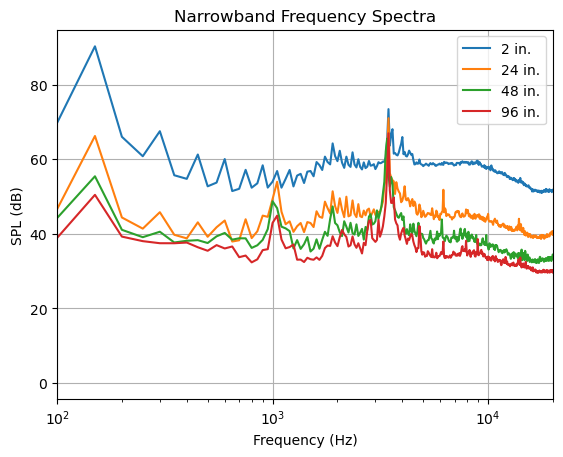

In [7]:
plt.plot(troyfreq2, troyspl2[6], label="2 in.")
plt.plot(troyfreq24, troyspl24[6], label="24 in.")
plt.plot(troyfreq48, troyspl48[6], label="48 in.")
plt.plot(troyfreq96, troyspl96[6], label="96 in.")
plt.grid()
plt.legend()
plt.xscale("log")
plt.xlim([100, 20000])
plt.title("Narrowband Frequency Spectra")
plt.xlabel("Frequency (Hz)")
plt.ylabel("SPL (dB)")
plt.show()

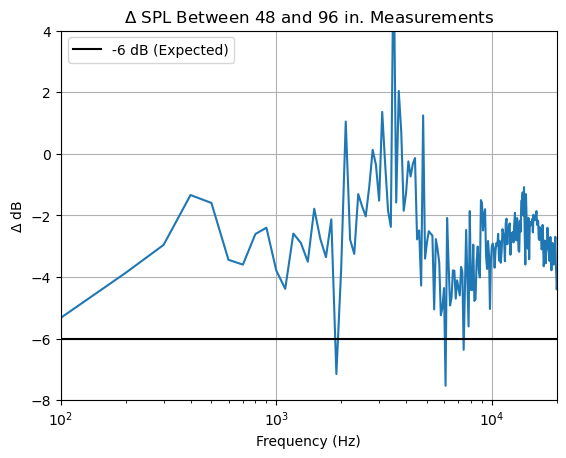

In [8]:
troydata4896 = troyspl96100[6] - troyspl48100[6]
plt.plot(troyfreq96100, troydata4896)
plt.xscale("log")
plt.xlim([100, 20000])
plt.plot([0, 100000], [-6, -6], "k", label="-6 dB (Expected)")
plt.legend()
plt.ylim([-8, 4])
plt.xlabel("Frequency (Hz)")
plt.ylabel("$\Delta$ dB")
plt.title("$\Delta$ SPL Between 48 and 96 in. Measurements")
plt.grid()
plt.show()

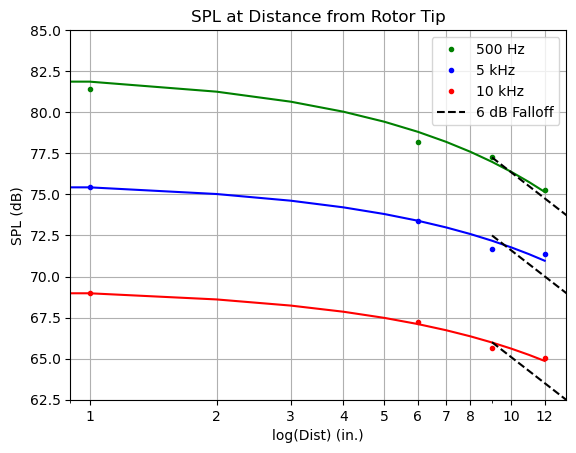

In [16]:
plt.plot(0, spl0[6][10], "g.")        #10 index = 500Hz
plt.plot(1, spl1[6][10], "g.")
plt.plot(6, spl6[6][10], "g.")
plt.plot(9, spl9[6][10], "g.")
plt.plot(12, spl12[6][10], "g.", label="500 Hz")
a500, b500 = np.polyfit([0, 1, 6, 9, 12], [spl0[6][10], spl1[6][10], spl6[6][10], spl9[6][10], spl12[6][10]], 1)
xs = np.arange(0, 13, 1)
plt.plot(xs, a500*xs+b500, "g")
plt.plot(0, spl0[6][100], "b.")        #100 index = 5kHz
plt.plot(1, spl1[6][100], "b.")
plt.plot(6, spl6[6][100], "b.")
plt.plot(9, spl9[6][100], "b.")
plt.plot(12, spl12[6][100], "b.", label="5 kHz")
a5k, b5k = np.polyfit([0, 1, 6, 9, 12], [spl0[6][100], spl1[6][100], spl6[6][100], spl9[6][100], spl12[6][100]], 1)
plt.plot(xs, a5k*xs+b5k, "b")
plt.plot(0, spl0[6][200], "r.")        #200 index = 10kHz
plt.plot(1, spl1[6][200], "r.")
plt.plot(6, spl6[6][200], "r.")
plt.plot(9, spl9[6][200], "r.")
plt.plot(12, spl12[6][200], "r.", label="10 kHz")
a10k, b10k = np.polyfit([0, 1, 6, 9, 12], [spl0[6][200], spl1[6][200], spl6[6][200], spl9[6][200], spl12[6][200]], 1)
plt.plot(xs, a10k*xs+b10k, "r")
# plt.legend()
plt.plot()
plt.grid()
plt.xlabel("log(Dist) (in.)")
plt.ylabel("SPL (dB)")
plt.title("SPL at Distance from Rotor Tip")
plt.ylim([62.5, 85])
plt.xscale("log")
plt.xlim([0.9, 13.5])
labels = ["1", "2", "3", "4", "5", "6", "7", "8","10", "12"]
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 10, 12], labels)
xs500 = [9*2**i for i in range(4)]
ys500 = [77.25-6*i for i in range(4)]
plt.plot(xs500, ys500, "k--", label="6 dB Falloff")
xs5k = [9*2**i for i in range(4)]
ys5k = [72.5-6*i for i in range(4)]
plt.plot(xs5k, ys5k, "k--")
xs10k = [9*2**i for i in range(4)]
ys10k = [66-6*i for i in range(4)]
plt.plot(xs10k, ys10k, "k--")
plt.legend()
plt.show()

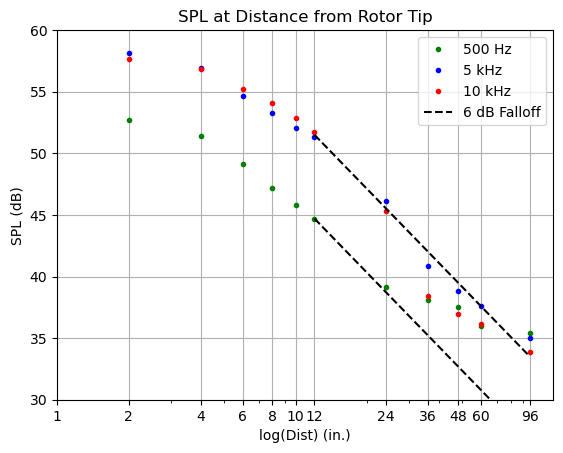

In [10]:
plt.plot(2, troyspl2[6][10], "g.")
plt.plot(4, troyspl4[6][10], "g.")
plt.plot(6, troyspl6[6][10], "g.")
plt.plot(8, troyspl8[6][10], "g.")
plt.plot(10, troyspl10[6][10], "g.")
plt.plot(12, troyspl12[6][10], "g.")
plt.plot(24, troyspl24[6][10], "g.")
plt.plot(36, troyspl36[6][10], "g.")
plt.plot(48, troyspl48[6][10], "g.")
plt.plot(60, troyspl60[6][10], "g.")
plt.plot(96, troyspl96[6][10], "g.", label="500 Hz")
plt.plot(2, troyspl2[6][100], "b.")
plt.plot(4, troyspl4[6][100], "b.")
plt.plot(6, troyspl6[6][100], "b.")
plt.plot(8, troyspl8[6][100], "b.")
plt.plot(10, troyspl10[6][100], "b.")
plt.plot(12, troyspl12[6][100], "b.")
plt.plot(24, troyspl24[6][100], "b.")
plt.plot(36, troyspl36[6][100], "b.")
plt.plot(48, troyspl48[6][100], "b.")
plt.plot(60, troyspl60[6][100], "b.")
plt.plot(96, troyspl96[6][100], "b.", label="5 kHz")
plt.plot(2, troyspl2[6][200], "r.")
plt.plot(4, troyspl4[6][200], "r.")
plt.plot(6, troyspl6[6][200], "r.")
plt.plot(8, troyspl8[6][200], "r.")
plt.plot(10, troyspl10[6][200], "r.")
plt.plot(12, troyspl12[6][200], "r.")
plt.plot(24, troyspl24[6][200], "r.")
plt.plot(36, troyspl36[6][200], "r.")
plt.plot(48, troyspl48[6][200], "r.")
plt.plot(60, troyspl60[6][200], "r.")
plt.plot(96, troyspl96[6][200], "r.", label="10 kHz")
plt.grid()
# plt.legend()
plt.xlabel("log(Dist) (in.)")
plt.ylabel("SPL (dB)")
plt.title("SPL at Distance from Rotor Tip")
plt.ylim([30, 60])
# plt.xlim([0, 100])
plt.xscale("log")
xs10k = [12*2**i for i in range(4)]
ys10k = [51.5-6*i for i in range(4)]
plt.plot(xs10k, ys10k, "k--", label="6 dB Falloff")
xs500 = [12*2**i for i in range(4)]
ys500 = [44.7-6*i for i in range(4)]
plt.plot(xs500, ys500, "k--")
plt.legend()
plt.xlim([1, 120])
labels = ["1", "2", "4", "6", "8", "10", "12", "24", "36", "48", "60", "96"]
plt.xticks([1, 2, 4, 6, 8, 10, 12, 24, 36, 48, 60, 96], labels)
plt.show()